In [13]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pandas as pd

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix
 
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
from sklearn.metrics import make_scorer
 
from sklearn.metrics import classification_report, accuracy_score
import random
random.seed(100)
 
import time
import pyodbc
print(pyodbc.drivers())
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve
)
pd.set_option('future.no_silent_downcasting', True)

['SQL Server', 'ODBC Driver 17 for SQL Server', 'SQL Server Native Client RDA 11.0', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']


In [33]:
# Load your data
tt_data = pd.read_csv('../data/interim/train_test_data.csv')
val_data = pd.read_csv('../data/interim/validation_data.csv')

In [34]:
tt_data.drop(columns={'Unnamed: 0', 'payer_code', 'age'}, inplace=True)
val_data.drop(columns={'Unnamed: 0', 'payer_code', 'age'}, inplace=True)


In [35]:
val_data.columns

Index(['encounter_id', 'race', 'gender', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_emergency', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_category', 'admission_category',
       'number_outpatient_boxcox', 'number_inpatient_boxcox', 'age_woe'],
      dtype='object')

In [10]:
tt_data.columns

Index(['encounter_id', 'race', 'gender', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_emergency', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_category', 'admission_category',
       'number_outpatient_boxcox', 'number_inpatient_boxcox', 'age_woe',
       'Target'],
      dtype='object')

In [36]:
# tt_data['Target'] = tt_data['Target'].replace({'NO':0, '>30': 0, '<30':1})
# tt_data['Target'].value_counts(normalize=True)


In [37]:
tt_data.columns

Index(['encounter_id', 'race', 'gender', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_emergency', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_category', 'admission_category',
       'number_outpatient_boxcox', 'number_inpatient_boxcox', 'age_woe'],
      dtype='object')

In [38]:
categorical_columns_tt = tt_data.select_dtypes(include=['object']).columns
categorical_columns_tt

Index(['race', 'gender', 'number_emergency', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'change', 'admission_type_desc',
       'discharge_category', 'admission_category'],
      dtype='object')

In [47]:
# tt_data = 
tt_data[~tt_data['discharge_category'].isin(['Expired', 'Hospice Care'])].shape

(83017, 37)

In [46]:
tt_data['discharge_category'].value_counts()

discharge_category
Discharged to Home                          60599
Transfers to Other Healthcare Facilities    17213
Other                                        4688
Expired                                      1420
Hospice Care                                  563
AMA (Against Medical Advice)                  517
Name: count, dtype: int64

In [39]:

X = pd.get_dummies(tt_data.drop(columns=['readmitted']), columns=categorical_columns_tt, drop_first=True)
y = tt_data['readmitted']

In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [41]:
# model = LogisticRegression(C= 0.01, penalty='l2', solver='liblinear')
model = RandomForestClassifier(max_depth= 5, min_samples_split= 50,n_estimators=100, random_state=42)

In [42]:
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_split=50, random_state=42)

Training Metrics:
Recall: 0.49
Precision: 0.65
F1 Score: 0.56
AUC-ROC: 0.69

Test Metrics:
Recall: 0.49
Precision: 0.66
F1 Score: 0.56
AUC-ROC: 0.68

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.62      0.76      0.68     31173
           1       0.65      0.49      0.56     28327

    accuracy                           0.63     59500
   macro avg       0.64      0.63      0.62     59500
weighted avg       0.64      0.63      0.63     59500


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.62      0.77      0.69     13360
           1       0.66      0.49      0.56     12140

    accuracy                           0.63     25500
   macro avg       0.64      0.63      0.62     25500
weighted avg       0.64      0.63      0.63     25500



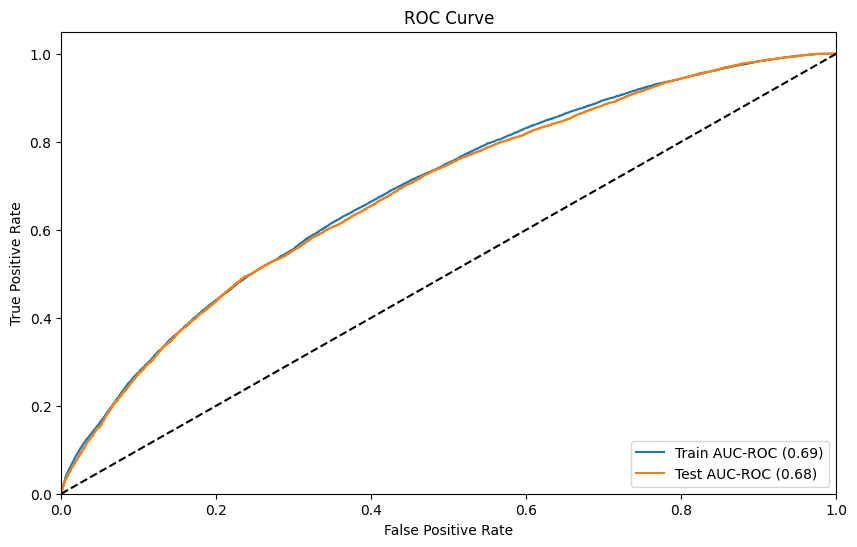

In [43]:
# Predicting on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Probabilities for AUC-ROC
y_train_prob = model.predict_proba(X_train)[:, 1]  # Probabilities for the positive class
y_test_prob = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for training set
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_prob)

# Calculate evaluation metrics for test set
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)

# Print the results
print(f"Training Metrics:")
print(f"Recall: {train_recall:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print(f"AUC-ROC: {train_auc:.2f}")

print(f"\nTest Metrics:")
print(f"Recall: {test_recall:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print(f"AUC-ROC: {test_auc:.2f}")

# Classification report for more detailed metrics
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Optionally plot the ROC curve
import matplotlib.pyplot as plt

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label="Train AUC-ROC (%.2f)" % train_auc)
plt.plot(fpr_test, tpr_test, label="Test AUC-ROC (%.2f)" % test_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

                                              Feature  Importance
8                             number_inpatient_boxcox    0.334227
68                         discharge_category_Expired    0.121246
5                                    number_diagnoses    0.099064
15                             number_emergency_FALSE    0.094400
7                            number_outpatient_boxcox    0.077229
74  admission_category_Transfers from Other Facili...    0.046754
16                              number_emergency_TRUE    0.027158
4                                     num_medications    0.025881
0                                        encounter_id    0.025089
69                    discharge_category_Hospice Care    0.022977
6                                         diabetesMed    0.015098
9                                             age_woe    0.013979
2                                  num_lab_procedures    0.011432
3                                      num_procedures    0.011396
1         

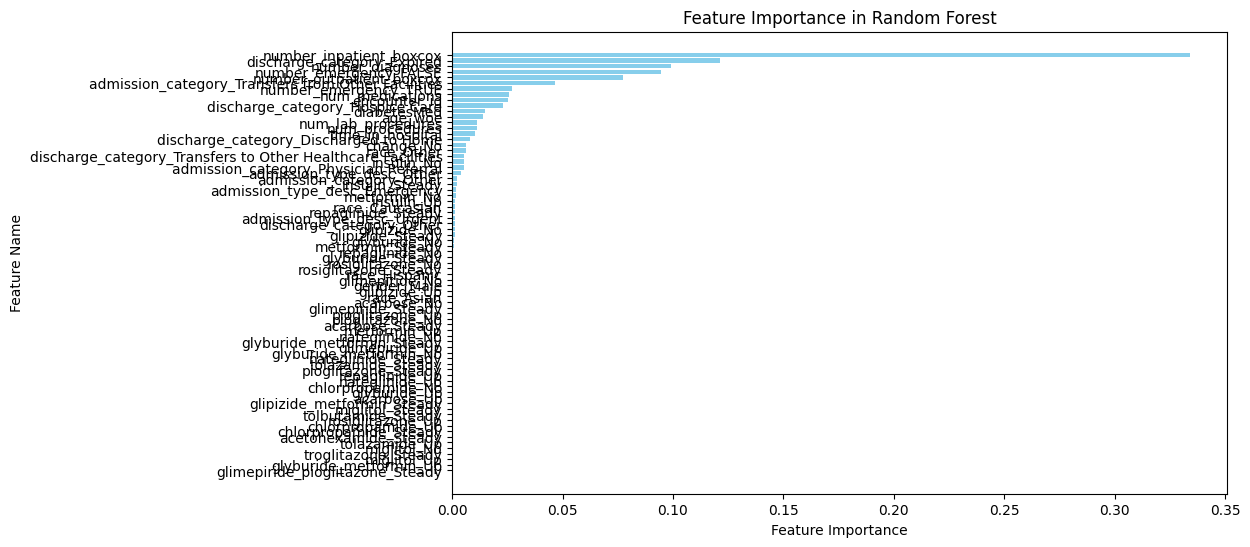

In [45]:
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()